# CSC-321: Data Mining and Machine Learning
# Irene Yin
## Assignment 6 Classification with probability

### Part 1: Naive Bayes

Everything so far has been a linear classifier. Now we'll change gears, and implement some non-linear classifiers. The first, as we saw in class, is Naive Bayes, which makes use of probability to make predictions.

We use Bayes' Theorem which allows us to calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes' Theorem is stated as:

$$P(class|data) =\frac{(P(data|class) * P(class))}{P(data)}$$


Where P(class|data) is the probability of class given the provided data

We're going to break this down into several steps. Again, I've given you an initial contrived data set for you to test your functions. MAKE SURE you verify that you're getting the correct output. Use the slides and the example in class to overstand the overview of how naive bayes works.

Conceptually straightforward, there's still a lot to do to get this to work, and I'm going to take the problem bottom up. In order to understand the whole process, I recommend reading EVERYTHING before you start, to make sure you get why we're doing things this way.

Ultimately, we're going to do naive bayes prediction on an instance with numeric feature values. That means we need to calculate the gaussian probability density, and as you remember from class, that means we need to gather several statistics on a feature by feature basis. As you also remember, we need to calcualte the probabilities for all the classes. 

In the early steps, we'll be dealing with TWO input features and TWO class values (0 and 1) BUT DO NOT make any assumptions about the number of input features OR the number of class values.

#### (a) Separate by class

Just as in the slides, we need to calculate the probability of data by the class they belong to. We're going to do this in stages. Read all of the steps before coding. First, we need to separate our data by the class values. 

Our dataset contains TWO input features, and one class value. We'll assume (as we often do) that the LAST value of each instance is the class value.

Taking our dataset, create two variables, called X_values (containing a list of lists of input values) and y_values (a list of the class values). Pass these to a function that will create and return a dictionary, where the key is a class value, and the corresponding dictionary value is a list of all input instances with that class value. 

In [2]:
# Contrived data set

dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]

X_values = [i[:-1] for i in dataset]
y_values = [i[-1] for i in dataset]

def SeperateData(X_value, y_value):
  # return: a dictionary, where the key is a class value, and the corresponding dictionary value 
  #         is a list of all input instances with that class value.
  Dictionary = {}
  for index in range(len(y_value)):
    key = y_value[index]
    if key not in Dictionary:
      Dictionary[key] = [X_value[index]]
    else:
      Dictionary[key].append(X_value[index])
  return Dictionary

Dict = SeperateData(X_values, y_values)
print(Dict)
print("0 class: ", Dict[0])
print("1 class: ", Dict[1])







{0: [[3.393533211, 2.331273381], [3.110073483, 1.781539638], [1.343808831, 3.368360954], [3.582294042, 4.67917911], [2.280362439, 2.866990263]], 1: [[7.423436942, 4.696522875], [5.745051997, 3.533989803], [9.172168622, 2.511101045], [7.792783481, 3.424088941], [7.939820817, 0.791637231]]}
0 class:  [[3.393533211, 2.331273381], [3.110073483, 1.781539638], [1.343808831, 3.368360954], [3.582294042, 4.67917911], [2.280362439, 2.866990263]]
1 class:  [[7.423436942, 4.696522875], [5.745051997, 3.533989803], [9.172168622, 2.511101045], [7.792783481, 3.424088941], [7.939820817, 0.791637231]]


#### (b) Summarize the data

We are going to need two statistics from the data, the mean and the standard deviation. You should have the base of these functions in a previous assignment, remembering that the standard deviation is simply the square root of the variance. 

For this assignment, we need to compute the **average variance**, not the total variance as we did with SLR. Also, we're using a **SAMPLE** and not a **POPULATION**. You should know what that means with respect to what we divide by. Refer to the slides on SLR if you don't remember. 

In the contrived data, we have 3 features - 2 input features and an output feature, y.

We need the mean and standard deviation for each of our input features. Create a function that summarizes a given set of X_values instances, by calculating the mean and standard deviation on that data. We'll collect this information into a tuple, one per column, comprising the mean, the standard deviation and the number of elements in each column). Return a list of these tuples.

REMEMBER: Do NOT do anything that relies on the fact that are only 2 input features in this data. 

More generally, the output should be:

[(feature1_mean,feature1_std,feature1_count), (feature2_mean,feature2_std,feature2_count),....,(featureN_mean,featureN_std,featureN_count)]


In [3]:
# implement your function here, and copy across any functions you need to help you

def getMean(inputList):
    total = 0
    for num in inputList:
        total += num
    return total/len(inputList)

def getVariance(inputList):
  # return: the total variance of a list of values.
  meanValue = getMean(inputList)
  variance = 0
  for num in inputList:
    variance += (num-meanValue)**2
    aver_variance = variance/(len(inputList)-1)
  return aver_variance

def summarizeData(X_values):
  dataSummary = []
  for col in range(len(X_values[0])):
    currentcol = []
    for instance in X_values:
      currentcol.append(instance[col])
    mean = getMean(currentcol)
    Samplevariance = getVariance(currentcol)
    stadDevi = Samplevariance**0.5
    dataSummary.append((mean, stadDevi, len(currentcol)))
  return dataSummary

print(summarizeData(X_values))





[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


#### (c) Summarize data by class

We now need to combine the functions from (a) and (b) above. Create a  function, that takes X_values and y_values. Your function should split the data by class using your function from (a). 

It then calculates statistics for all instances of the data for each class using (b), getting a summary of the feature values for each feature, for each class.

The results - the list of tuples of statistics, one per column - should then be stored in a dictionary by their class value. summarizeByClass should return such a dictionary. I include my output on the included dataset for verification. 

In [4]:

# implement your function here
def summarizeByClass(X_value, y_value):
  #return: a dictionary which stored the class value and the summary of features values for each feature.
  Dict = SeperateData(X_value, y_value)
  SummaryDict = {}
  for Class in Dict:
    Classdata = Dict[Class]
    dataStatistic = summarizeData(Classdata)
    SummaryDict[Class] = dataStatistic
  return SummaryDict

# The output dictionary for the contrived data should look like:
# {0: [(2.7420144012, 0.9265683289298018, 5), (3.0054686692, 1.1073295894898725, 5)], 1: [(7.6146523718, 1.2344321550313704, 5), (2.9914679790000003, 1.4541931384601618, 5)]}
print(summarizeByClass(X_values, y_values))


{0: [(2.7420144012, 0.9265683289298018, 5), (3.0054686692, 1.1073295894898725, 5)], 1: [(7.6146523718, 1.2344321550313704, 5), (2.9914679790000003, 1.4541931384601618, 5)]}


#### (d) Guassiaun Probability Density

We're working with features that contain numerical rather than nominal data here, so we need to implement the gaussian probability density function (PDF) we talked about in class, so we can attach probabilities to real values. A gaussian distribution can be summarized from two values - mean and standard deviation. The gaussian PDF is calculated as follows:


$$probability(x) = \frac{1}{\sqrt{ 2 * \pi } * \sigma}*e^-(\frac{(x-mean(x))^2}{2 * \sigma^2})$$

Where:
- sigma is the standard deviation
- e is Euler's number (math.exp(x)) 

Hopefully, you can see why we're going to need the mean and the std_dev from function (c). I find it incredibly helpful to calculate the above equation in stages - i.e. calculate the first part of the equation and the exponent separately, then combine them at the end.

Create a function that:
- takes a value (x)
- takes a mean
- takes a standard deviation

and returns the probability of seeing that value, using the formula above.

In [5]:
import math
# Implement your function here

def GaussianPDF(value, mean, stadDevi):
  # return: the probability of seeing that value, using the fomula above.
  firstPart = 1/(math.sqrt(2*math.pi)*stadDevi)
  exponent = -(((value - mean)**2)/(2*stadDevi **2))
  probability = firstPart*math.exp(exponent)
  return probability


#### (e) Class Probabilities

We can now use probabilites from our training data to calculate the class probabilities for any instance of new data, by creating a function called calculateProbabilities. 

Probabilites have to be calculated separately for each possible class value; for each class value we have to calculate the likelihood that the new instance belongs to that class value. This is exactly what I work through on the slides, so refer to those if it's helpful. The probability that a piece of data belongs to a class value is calculated by:

$$P(class|data) =(P(data|class) * P(class))$$


The divison from Bayes' Theorem has been removed, because we're just trying to *maximize* the result of the formula above. The largest value we get for a class value determines which class value we assign. In the case where we have TWO input features in our data (X1 and X2), the probablility that an instance belongs to class value 0 is calculated by:

$$P(class=0|X_{1},X_{2}) = P(X_{1}|class=0) * P(X_{2}|class=0) * P(class=0)$$

We have to repeat this for each class value, and then choose the class value with the highest score. We should not assume a fixed number of input features, X, the above was just an illustration. More generally it is:

$$P(class=0|X_{1},X_{2}) = P(X_{1}|class=0) * P(X_{2}|class=0) *  ... * P(X_{N}|class=0) * P(class=0)$$

We'll start by creating a function that will return the probabilities of predicting each class value for a given instance. 

This function will take a dictionary of summaries (as returned by (c), above) and an instance, and will generate a dictionary of probabilites, with one entry per class. The steps are as follows:

- We need to calculate the total number of training instances, by counting the counts stored in the summary statistics. So if there are 9 instances with one label, and 5 with another (as in the weather data) then we need to know there are 14 instances total. Thankfully, in the data from function (c), we know where to find those counts for each class. 

- This will help us calculate the prior probability, P(class), as the ratio of rows with a given class divided by all rows in the training data

- Next probabilities are calculated for each feature value in the instance to be classified. Using the function from (d), we can generate a probability of associating a feature value with a class value. Those probabilites are multiplied together as they are accumulated with the formula given above. 

- The process is repeated for each class in the data

- Return the dictionary of probabilities for each class for the new instance

Some things that might help with implementation. 

- Dictionaries are your friend here
- List comprehensions are also your friend
- The data returned by (c) above is already divided by class. You can:
    - discover the prior probability from this data (how many instances for this class, divided by the total instances)
    - iterate over the tuples, which give you the information (mean, std_dev, count) on a per column basis
    - calculate probability given the attribute value corresponding to that column using your function from (d)

Try this out on the contrived data. You should be able to calculate all the relevant scores by hand to determine if your code is accurate.

NOTE: If you want to output ACTUAL probabilities by class, we divide each score in the dictionary for an instance, by the sum of the values. You don't need to do this, as I've included code to do it for you.


In [6]:

# Implement your function here

def calculateProbabilities(summaries, instance):
    #return: the probabilities of predicting each class value for a given instance.
    probDict = {}
    totalinstance = 0
    for classValue in summaries:
        totalinstance += summaries[classValue][0][-1]
    for classValue in summaries:
        priorProb = summaries[classValue][0][-1]/totalinstance
        classProb = priorProb
        for i in range(len(summaries[classValue])):
            mean = summaries[classValue][i][0]
            stadDevi = summaries[classValue][i][1]
            instanceProb = GaussianPDF(instance[i], mean, stadDevi)
            classProb *= instanceProb
        probDict[classValue] = classProb
    return probDict

# Test it out here
# Get a bunch of summaries from your function from (c)
# Pass those summaries (a dictionary) to your function from (e)
# in order to predict the class of the test instance, below.
# PRINT OUT the dictionary returned by calculateProbabilities
# And compare to my score, below

testInstance = X_values[0]
summaries = summarizeByClass(X_values,y_values)
probabilities = calculateProbabilities(summaries, testInstance)
print('Probabilities are: ',probabilities)

# I think if everything works, the returned value from (e) should be:
# {0: 0.05032427673372075, 1: 0.00011557718379945765}
# which according to the percentage calculation given should be:
# 99.77% in favour of class 0 
# Code to compute this is given below, assuming you store the dictionary returned
# from calculateProbabilities in a variable called probabilities

print()
sumProbs = sum([value for _,value in probabilities.items()])
for key,value in probabilities.items():
    normProb = value / sumProbs * 100
    print('The probability of the instance belonging to class {} is {:.2f}'.format(key,normProb))

Probabilities are:  {0: 0.05032427673372076, 1: 0.00011557718379945765}

The probability of the instance belonging to class 0 is 99.77
The probability of the instance belonging to class 1 is 0.23


#### (f) Tying it all together

You need to create a predict function. This function works very much as the example above, in that it takes a dictionary of summaries and a single row, and uses calculateProbabilites to get the resulting dictionary of probabilities. From this dictionary, find the largest value and corresponding class. Return this class. 

You also need a naiveBayes function, that takes a training set (X,train, y_train) and a test set (X_test). It needs to generate summary statistics from the training set (using (c), above), then make predictions for each instance in the test set, by calling your predict function for each instance, using the summaries generated. Append these predictions to a list you return.

Print out the list of actual values and predicted values, for now using the same data for training and testing.

In [7]:
import operator
# Implement predict(summaries,instance) here

def predict(summaries,instance):
  # return: find the largest value and return corresponding class
  ProbDict = calculateProbabilities(summaries,instance)
  return max(ProbDict.items(), key=operator.itemgetter(1))[0]

# Implement naive_bayes(X_train,y_train,X_test) here	
def naiveBayes(X_train,y_train, X_test):
    classSummary = summarizeByClass(X_train, y_train)
    return [predict(classSummary, instance) for instance in X_test]

X_train = X_values
X_test = X_train
y_train = y_values
y_test = y_train

NBpredict = naiveBayes(X_train, y_train, X_test)
print("The actural values: ", y_test)
print("The predicted values: ", NBpredict)




The actural values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
The predicted values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


### Part 2: Applying to real data

You've seen bits of the iris dataset in class. It's one of the most well known data sets in machine learning and data mining. So you might as well have a go at it! You can find out more about it here: https://en.wikipedia.org/wiki/Iris_flower_data_set

I don't need to use pandas to load the data, as the iris data set is included with scikit learn. Below, I'm going to load the data for you. You have to:

- call your naive bayes algorithm, using a Stratified 5-fold cross-validation
- compare this to some reasonable baseline, using your code
- give me a short write up of the results

This will require checking back at how I did things last week, with respect to doing a Stratified 5-fold cross-validation.

In [8]:
# Do part 2 here

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_values = iris.data
y_values = iris.target

rows,cols = X_values.shape
print("This is the IRIS training data set. It has", rows, "instances, and it has", cols, "features.\n")

# The below is only to show you what the class values are
# You do NOT need to use class_values anywhere

X_train = X_values
X_test = X_train
y_train = y_values
y_test = y_train

class_values = set(y_values)
print("The IRIS test data class has the folowing values:", class_values, "\n")

# baseline,ZeroRC
def zeroRC(train, test):
  # return baseline
  commonElement = max(set(train), key = train.count)
  return [commonElement for i in range(len(test))]

ZeroR_predict = zeroRC(y_train.tolist(), X_test)

# naive bayes, using a Stratified 5-fold cross-validation
def accuracy(actual_value, predicted_value):
  # return how many times the function predicts correctly in ratio.
  counter = 0 
  for i in range(len(actual_value)):
    if actual_value[i] == predicted_value[i]:
      counter += 1
  return counter/len(actual_value)


skf = StratifiedKFold(n_splits=5)
NB_scores = []
zr_scores = []
for train_index, test_index in skf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    NB_pred = naiveBayes(X_train, y_train, X_test)
    zeroR_pred = zeroRC(y_train.tolist(),X_test)

    accuracy_NB = accuracy(y_test, NB_pred) * 100
    NB_scores.append(accuracy_NB)

    accuracy_zeroRC = accuracy(y_test, zeroR_pred) * 100
    zr_scores.append(accuracy_zeroRC)
print('Naive Bayes score:', NB_scores)
print('zeroR score: ', zr_scores)
NB_average_accuracy = sum(NB_scores)/len(NB_scores)
zr_average_accuracy = sum(zr_scores)/len(zr_scores)

print()
print("Stratified 5-Fold Cross-Validation")
print()


print('Naive Bayes accuracy: {:.2f}% ({:.2f}% / {:.2f}%)'.format(NB_average_accuracy, min(NB_scores), max(NB_scores)))

print('ZeroR accuracy: {:.2f}% ({:.2f}% / {:.2f}%)'.format(zr_average_accuracy, min(zr_scores), max(zr_scores)))




This is the IRIS training data set. It has 150 instances, and it has 4 features.

The IRIS test data class has the folowing values: {0, 1, 2} 

Naive Bayes score: [93.33333333333333, 96.66666666666667, 93.33333333333333, 93.33333333333333, 100.0]
zeroR score:  [33.33333333333333, 33.33333333333333, 33.33333333333333, 33.33333333333333, 33.33333333333333]

Stratified 5-Fold Cross-Validation

Naive Bayes accuracy: 95.33% (93.33% / 100.00%)
ZeroR accuracy: 33.33% (33.33% / 33.33%)


According to the accuracy, we have that the baseline is 33.33%, which does make sense because we are using stratified 5-fold cross-validation where we are faily distributing 150 instances into 5 groups where each group has same number of instance in each class. The baseline is 33.33% means that there is 33.33% chance that the prediction of which class an instance belongs is correct. 

Then we have the accuracy of Naive Bayes is 95.33%, which is much higher than the baseline. The naive Bayes performs very well. The prediction of which type of iris flower by using Naive bayes has 95.33% chance that is correct. This also make sense because Naive Bayes doesn't require accurate probability estimates as long as maximun probability is assigned to correct class. And also, each class in this iris flower dataset has a very decentralized distributions where they don't overlap a lot.  

We cannot determine which features are the more important since NB is considering the probability from all the features. We cannot seperatly know which features is more important just based on NB.

## Part 3: Introduction to scikit-learn

One of the most popular open-source python machine learning libraries is scikit-learn.

As we go through this class I'll introduce you to some of the functionality. Below I want you to use Gaussian Naive Bayes.

You can find out more in general at: https://scikit-learn.org/stable/index.html

This time, I'm only doing the bare minimum. I'll load the relevant models from scikit-learn, but it's up to you to train and test them, and report the scores appropriately. Your scores should be the same as your code, above.

You need to:
- Use [gaussian naive bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- Use a reasonable baseline
- Use a reasonable measure of performance
- Perform a stratified 5 fold cross validation
- Collect the results
- Print the mean, the min and the max of each cross-validation experiment


Naive Bayes score : [0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]
zeroR score :  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

Stratified 5-Fold Cross-Validation

Naive Bayes accuracy: 95.33% (93.33% / 100.00%)
ZeroR accuracy: 33.33% (33.33% / 33.33%)


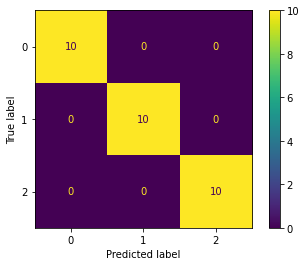

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#GNB
GNB_clf = GaussianNB()

# ZeroR
zr_clf = DummyClassifier(strategy="most_frequent")

skf = StratifiedKFold(n_splits=5)
NB_Scores = []
zr_Scores = []
for train_index, test_index in skf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    GNB = GNB_clf.fit(X_train, y_train)
    GNB_pred = GNB.predict(X_test)
    gnb_score = accuracy_score(y_test, GNB_pred) 
    NB_Scores.append(gnb_score)

    zeroR = zr_clf.fit(X_train, y_train)
    zeroR_pred = zeroR.predict(X_test)
    zeroR_score = accuracy_score(y_test, zeroR_pred) 
    zr_Scores.append(zeroR_score)

print('Naive Bayes score :', NB_Scores)

print('zeroR score : ', zr_Scores)
print()
print("Stratified 5-Fold Cross-Validation")
print()

NB_average_accuracy1 = (sum(NB_Scores)/len(NB_Scores))*100
zr_average_accuracy1 = (sum(zr_Scores)/len(zr_Scores)) *100
NB_min = min(NB_Scores) * 100
NB_max = max(NB_Scores) *100
zr_min = min(zr_Scores) *100
zr_max = max(zr_Scores) * 100
print('Naive Bayes accuracy: {:.2f}% ({:.2f}% / {:.2f}%)'.format(NB_average_accuracy1, NB_min, NB_max))

print('ZeroR accuracy: {:.2f}% ({:.2f}% / {:.2f}%)'.format(zr_average_accuracy1, zr_min, zr_max))

plot_confusion_matrix(GNB, X_test, y_test) 
plt.show()

